In [1]:
%cd ..

C:\Users\Brown Research\Documents\vr-exoskeleton


# rotation

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation

from vr_exoskeleton import data_utils, spatial

### Drop unused columns

If needed, change the file type from the generated `.txt` to `.csv`. Don't forget to move or delete the old `.txt` files.

In [3]:
# path_users = os.path.join('data', 'Users-rotation')

# cols = ['time_stamp(ms)',
#         'eye_in_head_left_x', 'eye_in_head_left_y', 'eye_in_head_left_z',
#         'eye_in_head_right_x', 'eye_in_head_right_y', 'eye_in_head_right_z',
#         'head_x', 'head_y', 'head_z',
#         'rotation_x', 'rotation_y', 'rotation_z', 'rotation_w']

# for folder in os.listdir(path_users):
#     path_user = os.path.join(path_users, folder)
#     fnames = os.listdir(path_user)
#     for fname in fnames:
#         base, ext = os.path.splitext(fname)
#         if ext != '.txt':
#             continue
#         path_trial = os.path.join(path_user, fname)
#         df = pd.read_csv(path_trial)
#         df.drop(columns=['time(100ns)', 'frame'], inplace=True)
#         path_csv = os.path.join(path_user, base + '.csv')
#         df.to_csv(path_csv, header=cols, index=False)

## Explore

In [4]:
users, tasks, user_task_paths = data_utils.get_user_task_paths(base_users_folder='Users-rotation')
users

['User20250127010']

In [5]:
df = pd.read_csv(user_task_paths[users[0]][tasks[0]][0])
df.head()

,time_stamp(ms),eye_in_head_left_x,eye_in_head_left_y,eye_in_head_left_z,eye_in_head_right_x,eye_in_head_right_y,eye_in_head_right_z,head_x,head_y,head_z,rotation_x,rotation_y,rotation_z,rotation_w
0,535481,-0.055618,0.069351,0.996033,-0.044556,0.053513,0.997559,0.044271,0.267156,0.962636,0.134555,0.024022,0.012331,-0.990538
1,535497,-0.056030,0.071259,0.995880,-0.044250,0.052673,0.997620,0.043780,0.266923,0.962723,0.134438,0.023766,0.012284,-0.990561
2,535505,-0.055939,0.071732,0.995850,-0.044067,0.052994,0.997620,0.043346,0.266794,0.962778,0.134382,0.023503,0.011969,-0.990579
3,535514,-0.056305,0.071930,0.995804,-0.043976,0.053802,0.997574,0.042912,0.266431,0.962898,0.134200,0.023263,0.011834,-0.990610
4,535523,-0.056030,0.071686,0.995850,-0.043350,0.055054,0.997528,0.042339,0.266058,0.963027,0.134015,0.022946,0.011654,-0.990645


In [6]:
columns_plot = [['eye_in_head_left_x', 'eye_in_head_left_y', 'eye_in_head_left_z'],
                ['eye_in_head_right_x', 'eye_in_head_right_y', 'eye_in_head_right_z'],
                ['head_x', 'head_y', 'head_z']]
x_plot = [[list() for _ in row_plot]
          for row_plot in columns_plot]

columns_rotation = ['rotation_x', 'rotation_y', 'rotation_z', 'rotation_w']
x_rotation = [list() for _ in columns_rotation]

for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            for i, row_plot in enumerate(columns_plot):
                for j, column_plot in enumerate(row_plot):
                    x_plot[i][j].append(df[column_plot].to_numpy())
                    
            for i, column_rotation in enumerate(columns_rotation):
                x_rotation[i].append(df[column_rotation].to_numpy())

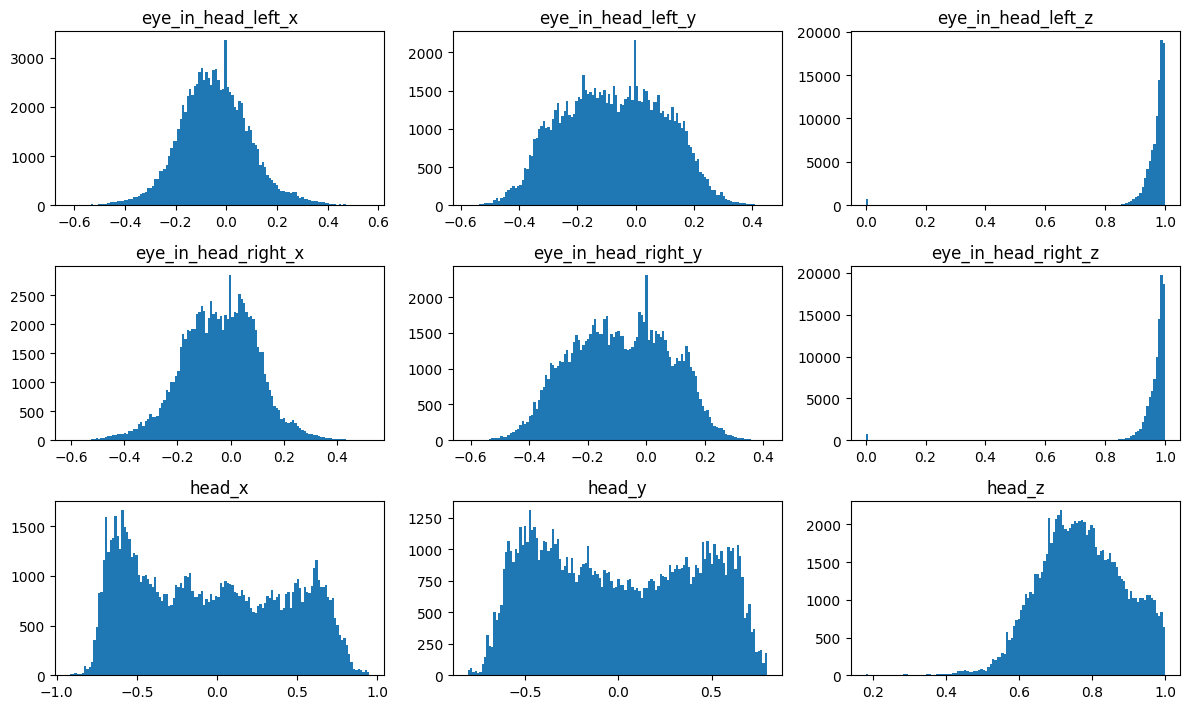

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(12, 7.2))
for i, row_plot in enumerate(columns_plot):
    for j, column_plot in enumerate(row_plot):
        x = np.concatenate(x_plot[i][j])
        axes[i][j].hist(x, bins=128)
        axes[i][j].set_title(column_plot)
plt.tight_layout()
plt.show()

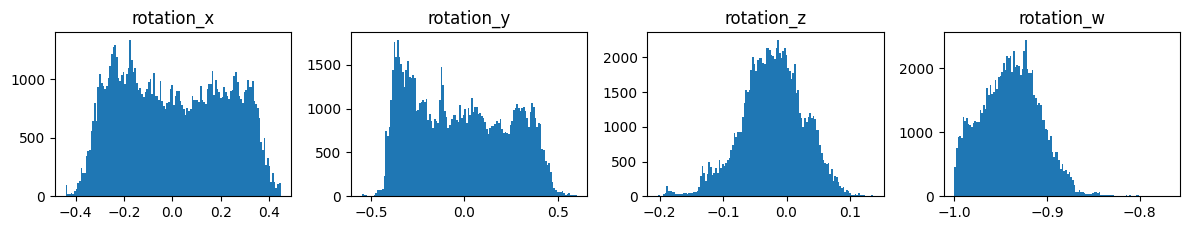

In [8]:
fig, axes = plt.subplots(ncols=4, figsize=(12, 2.4))
for i, column_rotation in enumerate(columns_rotation):
    x = np.concatenate(x_rotation[i])
    axes[i].hist(x, bins=128)
    axes[i].set_title(column_rotation)
plt.tight_layout()
plt.show()

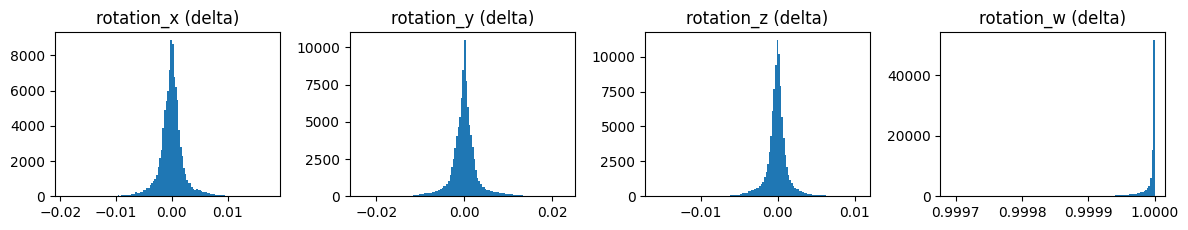

In [9]:
trial_rotation_deltas = list()
for user in users:
    for task in tasks:
        for trial in range(data_utils.N_TRIALS):
            df = pd.read_csv(user_task_paths[user][task][trial])
            data = df.to_numpy()
            quats = data[:, -4:]
            rotation_deltas = spatial.to_rotation_difference(quats[:-1], quats[1:])
            trial_rotation_deltas.append(rotation_deltas)

rotation_deltas = np.concatenate(trial_rotation_deltas)
_, axes = plt.subplots(1, 4, figsize=(12, 2.4))
for i, column_rotation in enumerate(columns_rotation):
    axes[i].hist(rotation_deltas[:, i], bins=128)
    axes[i].set_title(f'{column_rotation} (delta)')
plt.tight_layout()
plt.show()